In [1]:
cd /data/store01/data_dirs/students/ucfafyi/S2_MODIS

/data/store01/data_dirs/students/ucfafyi/S2_MODIS


In [2]:
from Py6S import *
import cPickle as pkl
import pylab as plt
%matplotlib inline
import numpy as np
from functools import partial
#import gp_emulator
from scipy.stats import linregress
import sys
sys.path.insert(0, 'python')
from nicer_plot import *
plot_config()
from fastRWpkl import *

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
S2_RSRs = pkl.load(open('pkls/S2_RSRs.pkl', 'r'))

In [27]:
def atm(p, RSRs=None):
    #print len(p[0])
    # ele in km
    TOA_refs , aot550, water, ozone, sz ,sa, vz, va , ele, month, day= p
    
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    s = SixS(path)
    s.altitudes.set_target_custom_altitude(ele)
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = sa
    s.geometry.solar_z = sz
    s.geometry.view_a = va
    s.geometry.view_z = vz
    s.geometry.month = month
    s.geometry.day = day 
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    coreds = []
    for i,RSR in enumerate(RSRs):
        s.wavelength = Wavelength(RSR)
        s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(TOA_refs[i])
        s.run()  
        cored = s.outputs.atmos_corrected_reflectance_lambertian
        coreds.append(cored)
    return coreds

####  Showing different month and days without any difference on the final corection results by looping over different days

In [29]:
va = 0
sa = 0
day =1
month=1
#TOA_ref , aot550, water, ozone, sz ,sa, vz, va , ele
p = [[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6],0.4,2,0.3, 45, 20, 20, 190, 0.2, month, day]
cored = []
for mon in range(1,13):
    for d in range(1,30, 5):
        p[-1] = d
        p[-2] = mon
        print p
        cored.append(atm(p, RSRs=S2_RSRs))

[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 1, 6]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 1, 11]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 1, 16]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 1, 21]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 1, 26]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 2, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 2, 6]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 2, 11]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 2, 16]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 2, 21]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 20, 190, 0.2, 2, 26]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2

In [30]:
cored

[[0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.58608, 0.46922, 0.44228, 0.58523, 0.6598],
 [0.17469, 0.48477, 0.586

####  Testing on different angles, azimuth, particulaly

In [31]:
va = 0
sa = 0
day =1
month=1
#TOA_ref , aot550, water, ozone, sz ,sa, vz, va , ele, month, day
p = [[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6],0.4,2,0.3, 45, 20, 20, 190, 0.2, month, day]
cored = []
for va in range(0,360,5):
    for sa in range(0,360, 40):
        p[-4] = va
        p[-6] = sa
        print p
        cored.append(atm(p, RSRs=S2_RSRs))

[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 0, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 40, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 80, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 120, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 160, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 200, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 240, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 280, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 320, 20, 0, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 0, 20, 5, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 40, 20, 5, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 80, 20, 5, 0.2, 1, 1]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 120, 20, 5, 0.2, 

In [48]:
angles = []
for va in range(0,360,5):
    for sa in range(0,360, 40):
        angles.append([va, sa])

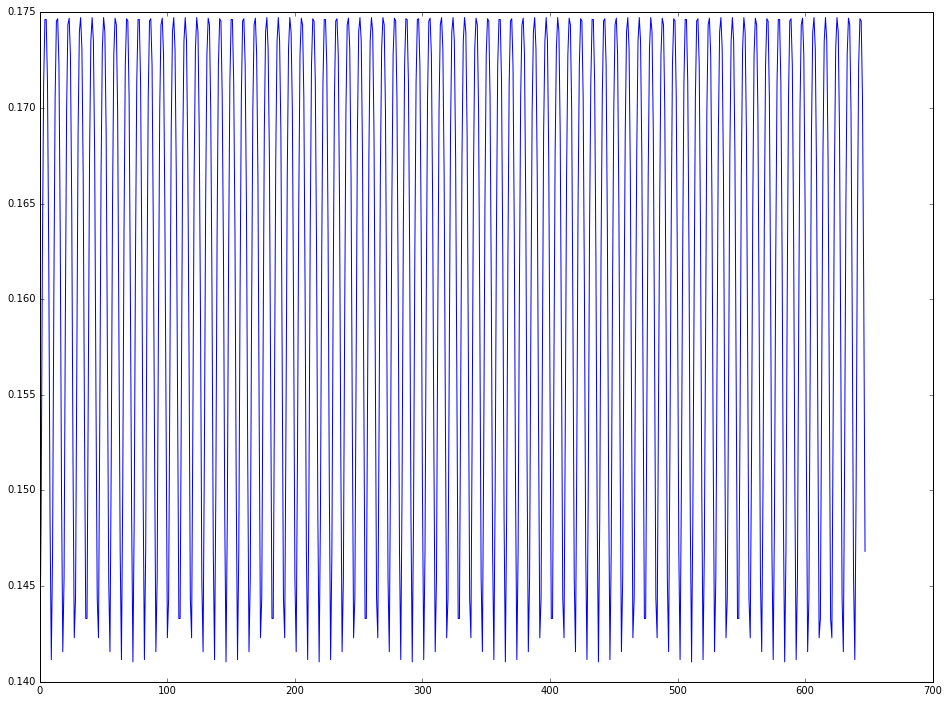

In [35]:
plt.figure(figsize=(16,12))
plt.plot(np.array(cored)[:,0])

In [39]:
np.array(cored)[:,0]

array([ 0.14104,  0.14856,  0.16215,  0.17134,  0.17462,  0.17462,
        0.17134,  0.16215,  0.14856,  0.14116,  0.14682,  0.16029,
        0.17056,  0.17454,  0.17466,  0.17222,  0.16349,  0.14997,
        0.14157,  0.1454 ,  0.15879,  0.16986,  0.17434,  0.17469,
        0.17277,  0.16494,  0.15169,  0.1423 ,  0.14437,  0.15705,
        0.16869,  0.17397,  0.17472,  0.17308,  0.16647,  0.15362,
        0.14331,  0.14331,  0.15512,  0.16748,  0.17349,  0.17472,
        0.17349,  0.16748,  0.15512,  0.14437,  0.1423 ,  0.15362,
        0.16647,  0.17308,  0.17472,  0.17397,  0.16869,  0.15705,
        0.1454 ,  0.14157,  0.15169,  0.16494,  0.17277,  0.17469,
        0.17434,  0.16986,  0.15879,  0.14682,  0.14116,  0.14997,
        0.16349,  0.17222,  0.17466,  0.17454,  0.17056,  0.16029,
        0.14856,  0.14104,  0.14856,  0.16215,  0.17134,  0.17462,
        0.17462,  0.17134,  0.16215,  0.14997,  0.14116,  0.14682,
        0.16029,  0.17056,  0.17454,  0.17466,  0.17222,  0.16

In [54]:
raa = []
for i in np.array(cored)[:74,0]:
     raa.append(np.array(angles)[np.where(np.array(cored)[:,0]==i)[0]])

In [58]:
raa

[array([[  0,   0],
        [ 40,  40],
        [ 80,  80],
        [120, 120],
        [160, 160],
        [200, 200],
        [240, 240],
        [280, 280],
        [320, 320]]), array([[  0,  40],
        [  0, 320],
        [ 40,   0],
        [ 40,  80],
        [ 80,  40],
        [ 80, 120],
        [120,  80],
        [120, 160],
        [160, 120],
        [160, 200],
        [200, 160],
        [200, 240],
        [240, 200],
        [240, 280],
        [280, 240],
        [280, 320],
        [320,   0],
        [320, 280]]), array([[  0,  80],
        [  0, 280],
        [ 40, 120],
        [ 40, 320],
        [ 80,   0],
        [ 80, 160],
        [120,  40],
        [120, 200],
        [160,  80],
        [160, 240],
        [200, 120],
        [200, 280],
        [240, 160],
        [240, 320],
        [280,   0],
        [280, 200],
        [320,  40],
        [320, 240]]), array([[  0, 120],
        [  0, 240],
        [ 40, 160],
        [ 40, 280],
        [ 80, 200

#### so in reality only the relative azimuth angle maters, which define the final correction for with different viewing azimuth angles.

In [4]:
def atm(p, RSRs=None):
    #print len(p[0])
    # ele in km
    TOA_refs , aot550, water, ozone, sz, vz, raa , ele= p
    
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    s = SixS(path)
    s.altitudes.set_target_custom_altitude(ele)
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = sz
    s.geometry.view_a = raa
    s.geometry.view_z = vz
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    coreds = []
    for i,RSR in enumerate(RSRs):
        s.wavelength = Wavelength(RSR)
        s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(TOA_refs[i])
        s.run()  
        cored = s.outputs.atmos_corrected_reflectance_lambertian
        coreds.append(cored)
    return coreds

In [6]:
va = 0
sa = 0
#TOA_ref , aot550, water, ozone, sz , vz, raa , ele
p = [[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6],0.4,2,0.3, 45, 20, 190, 0.2]
cored = []
for raa in range(0,361):
        p[-2] = raa
        print p
        cored.append(atm(p, RSRs=S2_RSRs))

[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 0, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 1, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 2, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 3, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 4, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 5, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 6, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 7, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 8, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 9, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 10, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 11, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 12, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20, 13, 0.2]
[[0.2, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6], 0.4, 2, 0.3, 45, 20,

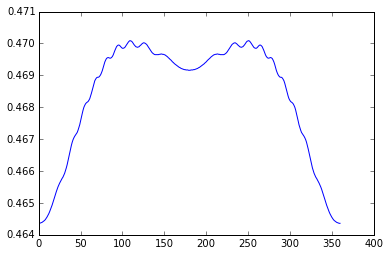

In [16]:
plt.plot(np.array(cored)[:,3])

So, the final parameters can be set to be illrelevant to the month and date, and the ralative azimuth angle between 0, 180 would be enough for whole range of 6S angles setup.

In [19]:
np.arange(0,181)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

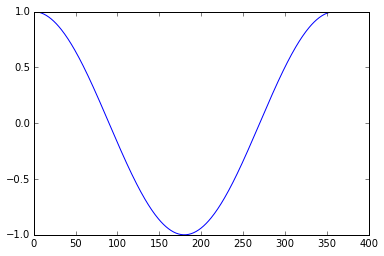

In [21]:
plt.plot(np.cos(np.arange(0,361)*np.pi/180.))

So a cosine would represent the whole 0 to 180 degree of raa value, and for angles larger than 180, it would be still represented by cosine, since they will have the same value for cosine with that value in the mirror part from the 180 degree.

In [30]:
np.arccos(np.arange(1, -1, -0.01))*180/np.pi

array([   0.        ,    8.10961446,   11.47834095,   14.06986775,
         16.26020471,   18.19487234,   19.94844359,   21.56518502,
         23.07391807,   24.49464847,   25.84193276,   27.12675312,
         28.35763658,   29.5413605 ,   30.68341711,   31.78833062,
         32.85988038,   33.901262  ,   34.91520625,   35.90406858,
         36.86989765,   37.81448851,   38.7394246 ,   39.64611115,
         40.53580211,   41.40962211,   42.26858443,   43.11360595,
         43.94551956,   44.76508467,   45.572996  ,   46.36989113,
         47.15635696,   47.9329352 ,   48.70012721,   49.45839813,
         50.2081805 ,   50.94987746,   51.68386553,   52.41049704,
         53.13010235,   53.8429918 ,   54.54945736,   55.24977425,
         55.94420226,   56.63298703,   57.31636115,   57.99454517,
         58.6677485 ,   59.33617026,   60.        ,   60.65941842,
         61.31459799,   61.96570347,   62.6128925 ,   63.25631605,
         63.89611886,   64.53243986,   65.16541251,   65.79516

So the 6S for this project can be set to:

In [14]:
def atm(p, RSRs=None):
    #print len(p[0])
    # ele in km
    #print  len(p[0])
    aot550, water, ozone, sz, vz, raa , ele= p[0][7:]
    
    TOA_refs = p[0][:7]
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    s = SixS(path)
    s.altitudes.set_target_custom_altitude(ele)
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = np.arcsin(sz)*180/np.pi
    s.geometry.view_a = np.arccos(raa)*180/np.pi
    s.geometry.view_z = np.arcsin(vz)*180/np.pi
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    coreds = []
    for i,RSR in enumerate(RSRs):
        s.wavelength = Wavelength(RSR)
        s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(TOA_refs[i])
        s.run()  
        cored = s.outputs.atmos_corrected_reflectance_lambertian
        coreds.append(cored)
    return coreds

In [ ]:
parameters = ['b2','b3','b4','b8','b11','b12','b8a','aot550', 'water', 'ozone', 'sz','vz','raa','ele']
min_vals = [0.,0.,0.,0.,0.,0.,0.,0.,0., 0., 0., 0.,-1, 0]
max_vals = [1,1,1,1,1,1,1,5.,60., 1, 1, 1, 1, 2]
n_train =200
n_validate = 50
retval = []
simulator = partial (atm, RSRs=S2_RSRs)
x = gp_emulator.create_emulator_validation ( simulator, parameters, min_vals, max_vals, 
                                            n_train, n_validate, do_gradient=True, n_tries=15, n_procs=8)
retval.append(x)

In [15]:
def atm(p, RSR=None):
    #print len(p[0])
    # ele in km
    #print  len(p[0])
    aot550, water, ozone, sz, vz, raa , ele= p
    
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    s = SixS(path)
    s.altitudes.set_target_custom_altitude(ele)
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = np.arcsin(sz)*180/np.pi
    s.geometry.view_a = np.arccos(raa)*180/np.pi
    s.geometry.view_z = np.arcsin(vz)*180/np.pi
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.wavelength = Wavelength(RSR)
    #s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(TOA_ref)
    s.run()
    return  s.outputs.atmospheric_intrinsic_reflectance, s.outputs.transmittance_total_scattering.total, s.outputs.spherical_albedo.total


In [17]:
atm((0.2, 0.3, 0.3, 0.68, 0, 0.68,0.3), RSR=rsr[0])

(0.08, 0.73233, 0.16118)

In [ ]:
import cPickle as pkl
from Py6S import *
import gp_emulator
import numpy as np
from functools import partial
S2_RSRs = pkl.load(open('pkls/S2_RSRs.pkl', 'r'))
def atm1(p, RSR=None):
    #print len(p[0])
    # ele in km
    #print  len(p[0])
    aot550, water, ozone, sz, vz, raa , ele= p[0]
    
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    s = SixS(path)
    s.altitudes.set_target_custom_altitude(ele)
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = np.arcsin(sz)*180/np.pi
    s.geometry.view_a = np.arccos(raa)*180/np.pi
    s.geometry.view_z = np.arcsin(vz)*180/np.pi
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.wavelength = Wavelength(RSR)
    #s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(TOA_ref)
    s.run()
    return  s.outputs.atmospheric_intrinsic_reflectance

def atm2(p, RSR=None):
    #print len(p[0])
    # ele in km
    #print  len(p[0])
    aot550, water, ozone, sz, vz, raa , ele= p[0]
    
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    s = SixS(path)
    s.altitudes.set_target_custom_altitude(ele)
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = np.arcsin(sz)*180/np.pi
    s.geometry.view_a = np.arccos(raa)*180/np.pi
    s.geometry.view_z = np.arcsin(vz)*180/np.pi
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.wavelength = Wavelength(RSR)
    #s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(TOA_ref)
    s.run()
    return  s.outputs.transmittance_total_scattering.total

def atm3(p, RSR=None):
    #print len(p[0])
    # ele in km
    #print  len(p[0])
    aot550, water, ozone, sz, vz, raa , ele= p[0]
    
    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'
    s = SixS(path)
    ss = []
    s = SixS(path)
    s.altitudes.set_target_custom_altitude(ele)
    s.altitudes.set_sensor_satellite_level()
    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)
    s.geometry = Geometry.User()
    s.geometry.solar_a = 0
    s.geometry.solar_z = np.arcsin(sz)*180/np.pi
    s.geometry.view_a = np.arccos(raa)*180/np.pi
    s.geometry.view_z = np.arcsin(vz)*180/np.pi
    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)
    s.aot550 = aot550
    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)
    s.wavelength = Wavelength(RSR)
    #s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(TOA_ref)
    s.run()
    return  s.outputs.spherical_albedo.total


parameters = ['aot550', 'water', 'ozone', 'sz','vz','raa','ele']
min_vals = [0.,0., 0., 0., 0.,-1, 0]
max_vals = [1.,5., 1, 0.97, 0.97, 1, 4]
n_train =500
n_validate = 100
retval = []
for atm in [atm1, atm2, atm3]:
    for band in range(7):
        simulator = partial (atm, RSR=S2_RSRs[band])
        x = gp_emulator.create_emulator_validation ( simulator, parameters, min_vals, max_vals, 
                                                    n_train, n_validate, do_gradient=True, n_tries=15, n_procs=8)
        retval.append(x)

pkl.dump(retval, open('6S_S2_abc.pkl', 'w'))

rsr = PredefinedWavelengths.LANDSAT_OLI_B2,PredefinedWavelengths.LANDSAT_OLI_B3,PredefinedWavelengths.LANDSAT_OLI_B4, \
PredefinedWavelengths.LANDSAT_OLI_B5, PredefinedWavelengths.LANDSAT_OLI_B6, PredefinedWavelengths.LANDSAT_OLI_B7

parameters = ['aot550', 'water', 'ozone', 'sz','vz','raa','ele']
min_vals = [0.,0., 0., 0., 0.,-1, 0]
max_vals = [1.,5., 1, 0.97, 0.97, 1, 4]
n_train =500
n_validate = 100
retval2 = []
for atm in [atm1, atm2, amt3]:
    for band in range(6):
        simulator = partial (atm, RSR=rsr[band])
        x = gp_emulator.create_emulator_validation ( simulator, parameters, min_vals, max_vals, 
                                                    n_train, n_validate, do_gradient=True, n_tries=15, n_procs=8)
        retval2.append(x)

pkl.dump(retval2, open('6S_L8_abc.pkl', 'w'))

In [15]:
simulator([0.5*np.array(min_vals)+ 0.5*np.array(max_vals),])

(0.003, 0.91666, 0.01768)

In [46]:
import cPickle as pkl
pkl.dump(retval, open('6S_S2_abc.pkl', 'w'))


In [47]:
import sys
sys.path.insert(0, 'python')
from fastRWpkl import *
parallel_rw_pkl(retval, '6S_emulation_S2_', 'w')

Length of data: 7
Length of data: 7


In [ ]:
retval = parallel_rw_pkl(None, '6S_emulation_S2_', 'r')

In [ ]:
retval

1 &  1.000 &  0.001 &  0.999 & 3.928e-03 & 9.269e-02
2 &  0.995 &  0.009 &  0.998 & 6.715e-03 & 2.507e+00
3 &  0.996 &  0.002 &  0.999 & 4.421e-03 & 1.176e-01
4 &  1.005 & -0.002 &  0.999 & 4.385e-03 & 9.036e-02
5 &  0.996 &  0.003 &  0.999 & 3.577e-03 & 9.111e-02
6 &  1.002 & -0.001 &  1.000 & 1.517e-03 & 4.680e-02
7 &  0.996 & -0.005 &  0.996 & 8.785e-03 & 1.908e-01


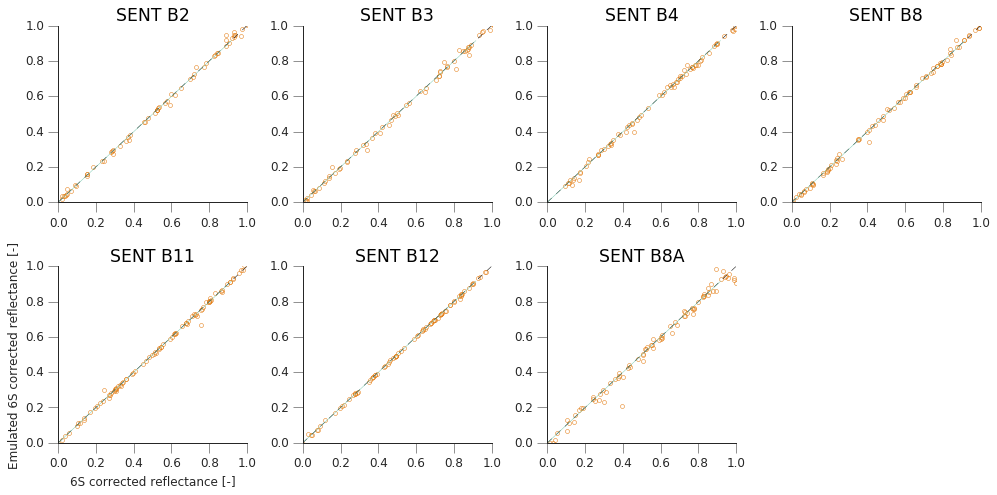

In [14]:
fig1, axs1 = plt.subplots ( nrows=2, ncols=4, figsize=(14,7))
axs1 = axs1.flatten()
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB11_MB6,SB12_MB7,SB8A_MB2').split(',')
for iband in xrange (7):
    
    gp, validate, validate_output, validate_gradient, emulated_validation, emulated_gradient = retval[iband]
    mask = np.abs(validate_output- emulated_validation.squeeze())== np.abs(validate_output- emulated_validation.squeeze()).max()
    slope, intercept, r_value, p_value, std_err = linregress( validate_output[~mask], emulated_validation.squeeze()[~mask] )
    axs1[iband].plot ( validate_output, emulated_validation, 'o', mec="#e3780a", mfc="none", rasterized=True, markersize= 4 )
    ymax = max(validate_output.max(), emulated_validation.max())
    if iband == 2:
        ymax = ymax*1.7
    axs1[iband].plot ( [0, 1.2*ymax], [0, 1.2*ymax], 'k--', lw=0.5)
    #p = np.polyfit ( validate_output, emulated_validation, 1)
    mae = np.abs(validate_output- emulated_validation.squeeze()).max()
    
    print "%d & %6.3f & %6.3f & %6.3f & %6.3e & %6.3e\n" % (iband+1, slope, intercept, r_value, std_err, mae),
    ymax = 1
    x = np.linspace(0, 1.1/1.2, 5)
    axs1[iband].plot ( x, np.polyval ( p, x), '-', lw=0.4  )
    axs1[iband].set_ylim ( 0, ymax )
    axs1[iband].set_xlim ( 0, ymax )
    pretty_axes ( axs1[iband])
    axs1[iband].set_title ('SENT %s'%(names[iband][1:-4]))
axs1[4].set_ylabel ( "Emulated 6S corrected reflectance [-]")
axs1[4].set_xlabel ( "6S corrected reflectance [-]")
plt.tight_layout()     
axs1[7].set_visible (False)

In [28]:
# one outler which is needed to be removed
gp, validate, validate_output, validate_gradient, emulated_validation, emulated_gradient = retval[1]
np.abs(validate_output- emulated_validation.squeeze()).max()

2.5069803070388681

In [33]:
linregress( validate_output[~mask], emulated_validation.squeeze()[~mask] )

LinregressResult(slope=0.99512073749819019, intercept=0.0088521229750879726, rvalue=0.99779859998919185, pvalue=4.0367333730074889e-116, stderr=0.0067154072259306965)

In [5]:
rsr = PredefinedWavelengths.LANDSAT_OLI_B2,PredefinedWavelengths.LANDSAT_OLI_B3,PredefinedWavelengths.LANDSAT_OLI_B4, \
PredefinedWavelengths.LANDSAT_OLI_B5, PredefinedWavelengths.LANDSAT_OLI_B6, PredefinedWavelengths.LANDSAT_OLI_B7

In [5]:
parameters = ['aot550', 'water', 'ozone', 'sz','vz','raa','ele']
min_vals = [0.,0., 0., 0., 0.,-1, 0]
max_vals = [1.,5., 1, 0.97, 0.97, 1, 4]
n_train =500
n_validate = 100
retval2 = []
for band in range(6):
    simulator = partial (atm, RSR=rsr[band])
    x = gp_emulator.create_emulator_validation ( simulator, parameters, min_vals, max_vals, 
                                                n_train, n_validate, do_gradient=True, n_tries=15, n_procs=8)
    retval2.append(x)

/home/ucfafyi/.local/lib/python2.7/site-packages/gp_emulator/GaussianProcess.py:59: RuntimeWarning: overflow encountered in exp
  exp_theta = np.exp ( self.theta )
/home/ucfafyi/.local/lib/python2.7/site-packages/gp_emulator/GaussianProcess.py:68: RuntimeWarning: invalid value encountered in multiply
  exp_theta[self.D+1]*np.eye ( self.n )
/home/ucfafyi/.local/lib/python2.7/site-packages/gp_emulator/GaussianProcess.py:176: RuntimeWarning: Optimisation resulted in linear algebra error. Returning last loglikelihood calculated, but this is fishy
  RuntimeWarning )


After 15, the minimum cost was -9.149385e+02
After 15, the minimum cost was -6.843989e+02
After 15, the minimum cost was -1.091635e+03


/home/ucfafyi/.local/lib/python2.7/site-packages/gp_emulator/GaussianProcess.py:65: RuntimeWarning: invalid value encountered in multiply
  np.tile( self.inputs[:, d], (self.n, 1)).T))**2


After 15, the minimum cost was -1.372537e+03
After 15, the minimum cost was -1.451432e+03
After 15, the minimum cost was -1.534892e+03


In [ ]:
pkl.dump(retval2, open('6S_emulation_L8.pkl', 'w'))

In [8]:
parallel_rw_pkl(retval2, '6S_emulation_L8_', 'w')

Length of data: 6
Length of data: 6


1 &  0.991 &  0.006 &  0.999 & 5.210e-03 & 1.409e-01
2 &  0.982 &  0.017 &  0.998 & 5.746e-03 & 1.216e-01
3 &  0.997 &  0.003 &  0.999 & 5.212e-03 & 1.196e-01
4 &  0.997 &  0.003 &  1.000 & 2.988e-03 & 8.019e-01
5 &  0.994 &  0.003 &  1.000 & 2.551e-03 & 1.319e-01
6 &  1.002 & -0.002 &  1.000 & 2.479e-03 & 5.123e-02


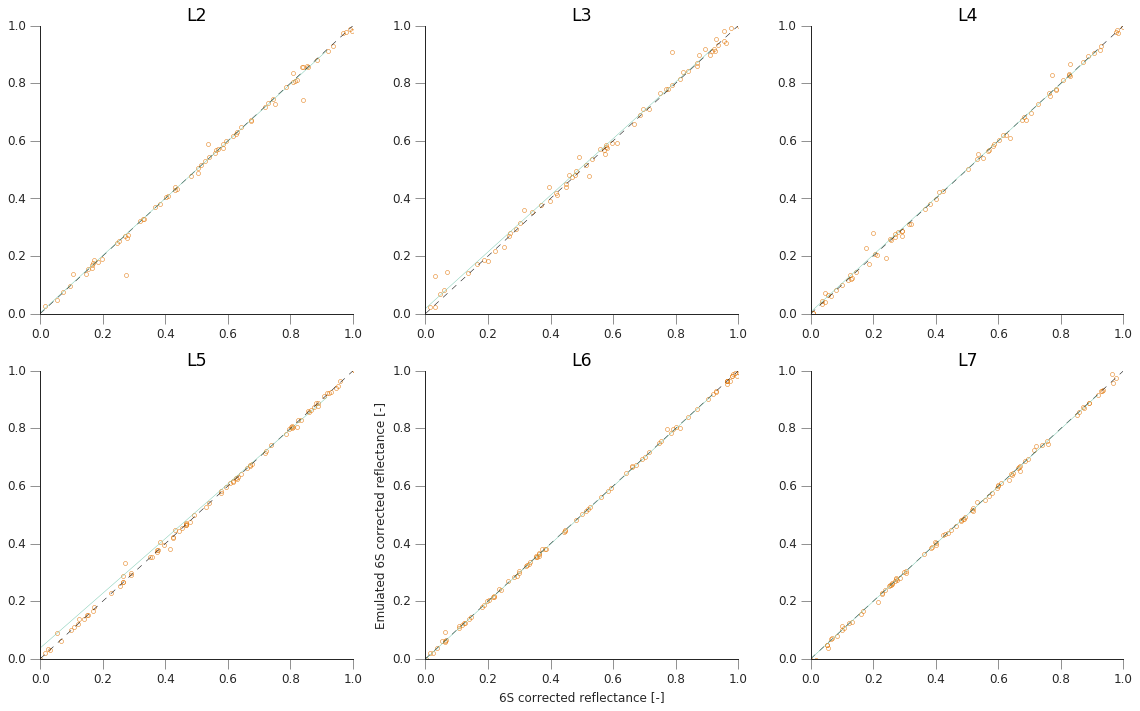

In [19]:
fig1, axs1 = plt.subplots ( nrows=2, ncols=3, figsize=(16,10))
axs1 = axs1.flatten()
names = ('L2,L3,L4,L5,L6,L7').split(',')
for iband in xrange (6):
    
    gp, validate, validate_output, validate_gradient, emulated_validation, emulated_gradient = retval2[iband]
    mask = np.abs(validate_output- emulated_validation.squeeze())== np.abs(validate_output- emulated_validation.squeeze()).max()
    slope, intercept, r_value, p_value, std_err = linregress( validate_output[~mask], emulated_validation.squeeze()[~mask] )
    axs1[iband].plot ( validate_output, emulated_validation, 'o', mec="#e3780a", mfc="none", rasterized=True, markersize= 4 )
    ymax = max(validate_output.max(), emulated_validation.max())
    if iband == 2:
        ymax = ymax*1.7
    axs1[iband].plot ( [0, 1.2*ymax], [0, 1.2*ymax], 'k--', lw=0.5)
    p = np.polyfit ( validate_output, emulated_validation, 1)
    mae = np.abs(validate_output- emulated_validation.squeeze()).max()
    
    print "%d & %6.3f & %6.3f & %6.3f & %6.3e & %6.3e\n" % (iband+1, slope, intercept, r_value, std_err, mae),
    ymax = 1
    x = np.linspace(0, 1.1/1.2, 5)
    axs1[iband].plot ( x, np.polyval ( p, x), '-', lw=0.4  )
    axs1[iband].set_ylim ( 0, ymax )
    axs1[iband].set_xlim ( 0, ymax )
    pretty_axes ( axs1[iband])
    axs1[iband].set_title ('%s'%(names[iband]))
axs1[4].set_ylabel ( "Emulated 6S corrected reflectance [-]")
axs1[4].set_xlabel ( "6S corrected reflectance [-]")
plt.tight_layout()     
#axs1[7].set_visible (False)